### Sobel Pipeline with Noise Reduction
1. Grayscale conversion: The input image is first converted into a grayscale image to simplify the processing.
2. Noise reduction: Various techniques can be used to reduce noise in the image, such as Gaussian blur, median filtering, or
bilateral filtering. These techniques help to smooth out the image and reduce the impact of noise on the edge detection
process.
3. Horizontal and vertical Sobel filtering: The Sobel operator is applied to the noise-reduced grayscale image in both the
horizontal and vertical directions. The Sobel operator is a small 3x3 matrix that is convolved with the image. The result of this
convolution highlights edges in the image.
4. Magnitude calculation: The horizontal and vertical edge maps are combined to obtain a single edge map. This is done by
calculating the magnitude of the gradient at each pixel. The magnitude is computed using the Pythagorean theorem, which
involves taking the square root of the sum of the squares of the horizontal and vertical gradients.
5. Thresholding: Finally, a threshold is applied to the edge map to produce a binary image, where the edges are represented by
white pixels and the non-edges are represented by black pixels. This threshold is usually set to a value that separates the
edges from the non-edges based on the magnitude of the gradient


In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def gaussian_blur(img):
    gaussian_filter = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=np.float32) / 16
    
    imgGaussian = cv2.filter2D(img, -1, gaussian_filter)
    return imgGaussian

In [87]:
def sobel_filtering(img):
    # Sobel kernels
    kernelX = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], dtype=np.float32)
    kernelY = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
    # Sobel convolution
    imgSobelX = cv2.filter2D(img, cv2.CV_64F, kernelX)
    imgSobelY = cv2.filter2D(img, cv2.CV_64F, kernelY)
    
    
    sobel = cv2.magnitude(imgSobelX, imgSobelY)
    
    return sobel


In [88]:
def pipeline(img):
    # Plot size
    fig = plt.figure(figsize = (10,10))
    
    # Convert image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Create subplots
    # Left Image
    fig.add_subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    # Apply gaussian blur
    imgGaussian = gaussian_blur(img)
    
    # Right Image
    fig.add_subplot(1,2,2)
    plt.imshow(imgGaussian, cmap='gray')
    plt.title('Gaussian Filter')
    
    # Apply Sobel Filter
    imgSobel = sobel_filtering(imgGaussian)
    
    fig = plt.figure(figsize = (10,10))
    # Left image
    fig.add_subplot(1,2,1)
    plt.imshow(imgGaussian, cmap='gray')
    plt.title('Gaussian Filter')
    # Right image
    fig.add_subplot(1,2,2)
    plt.imshow(imgSobel, cmap='gray')
    plt.title('Sobel Filter')
    
    # Thresholding
    ret, imgThreshold = cv2.threshold(imgSobel,150,255,cv2.THRESH_BINARY)
    
    fig = plt.figure(figsize = (10,10))
    # Left image
    fig.add_subplot(1,2,1)
    plt.imshow(imgSobel, cmap='gray')
    plt.title('Sobel Filter')
    # Right image
    fig.add_subplot(1,2,2)
    plt.imshow(imgThreshold, cmap='gray')
    plt.title('Thresholding Filter')
    
    
    

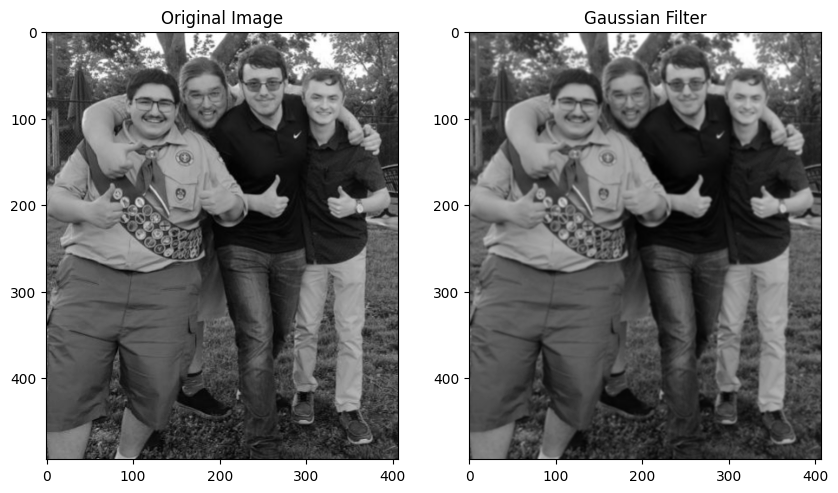

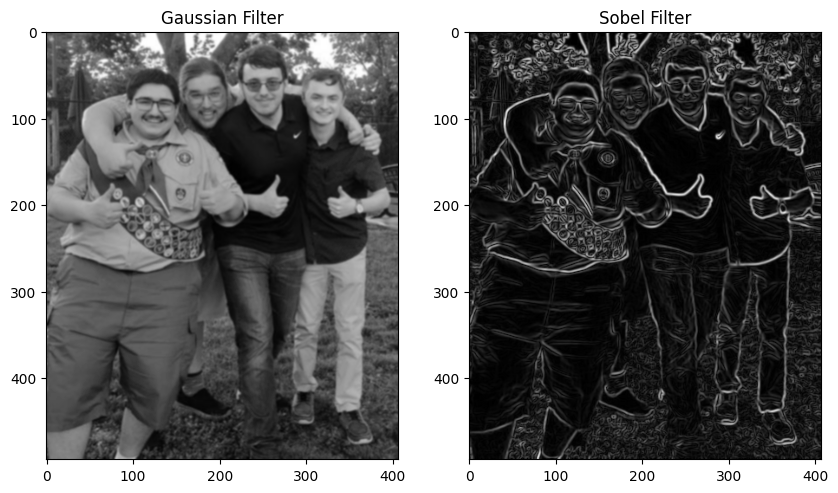

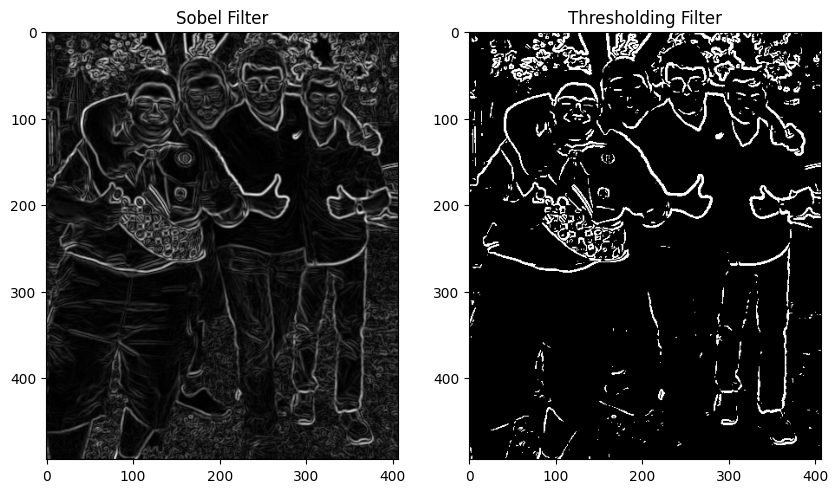

In [89]:
img = cv2.imread('eagle.png', 1)
pipeline(img)